In [ ]:
import kagglehub

path = kagglehub.dataset_download("jonathanoheix/face-expression-recognition-dataset")

print("Path to dataset files:", path)

100%|██████████| 121M/121M [00:06<00:00, 19.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jonathanoheix/face-expression-recognition-dataset/versions/1


In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('/root/.cache/kagglehub/datasets/jonathanoheix/face-expression-recognition-dataset/versions/1/images/images'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/root/.cache/kagglehub/datasets/jonathanoheix/face-expression-recognition-dataset/versions/1/images/images'.
There are 7 directories and 0 images in '/root/.cache/kagglehub/datasets/jonathanoheix/face-expression-recognition-dataset/versions/1/images/images/validation'.
There are 0 directories and 797 images in '/root/.cache/kagglehub/datasets/jonathanoheix/face-expression-recognition-dataset/versions/1/images/images/validation/surprise'.
There are 0 directories and 1216 images in '/root/.cache/kagglehub/datasets/jonathanoheix/face-expression-recognition-dataset/versions/1/images/images/validation/neutral'.
There are 0 directories and 1139 images in '/root/.cache/kagglehub/datasets/jonathanoheix/face-expression-recognition-dataset/versions/1/images/images/validation/sad'.
There are 0 directories and 1018 images in '/root/.cache/kagglehub/datasets/jonathanoheix/face-expression-recognition-dataset/versions/1/images/images/validation/fear'.
There ar

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "/root/.cache/kagglehub/datasets/jonathanoheix/face-expression-recognition-dataset/versions/1/images/images/train"
val_dir = "/root/.cache/kagglehub/datasets/jonathanoheix/face-expression-recognition-dataset/versions/1/images/images/validation"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=64,
                                               target_size=(224,224),
                                               class_mode="categorical",
                                               shuffle=True,
                                               )

val_data = val_datagen.flow_from_directory(val_dir,
                                            batch_size=64,
                                               target_size=(224,224),
                                               class_mode="categorical",
                                           shuffle=False
                                               )


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
len(train_data), len(val_data)

(451, 111)

In [ ]:
train_data.samples // train_data.batch_size, val_data.samples // val_data.batch_size

(450, 110)

In [21]:
emotions = ['angry','disgust','fear','happy','neutral','sad','surprise']

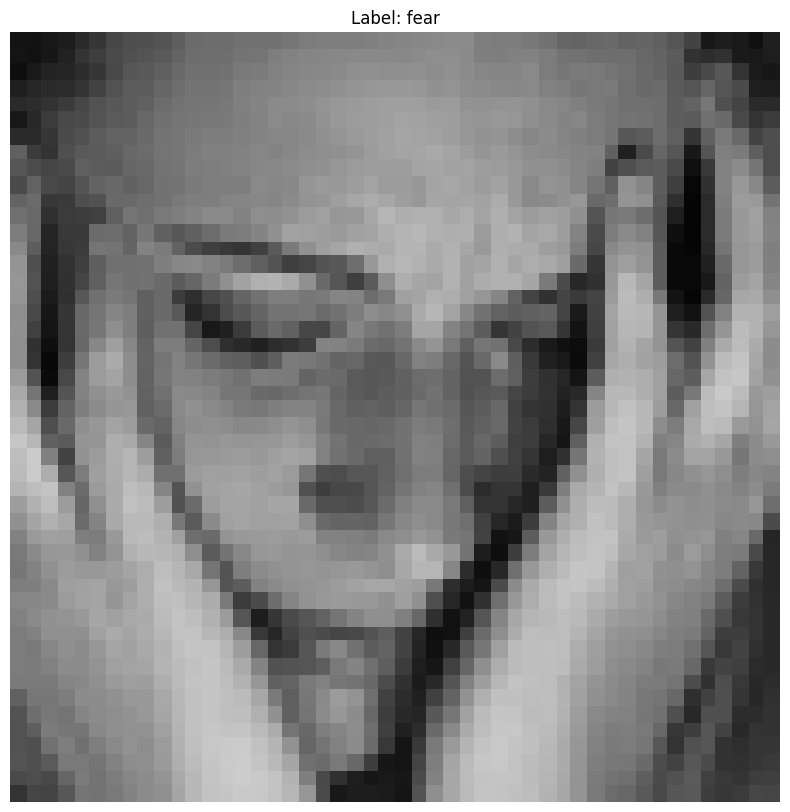

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

random_number = random.randint(0,len(train_data)-1)
random_img, random_label = train_data[random_number]
label = emotions[random_label.argmax()]
plt.figure(figsize=(10,10))
plt.imshow(random_img[0])
plt.title(f"Label: {label}")
plt.axis("off");

In [ ]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu",input_shape=(224,224,3)),
#     tf.keras.layers.MaxPool2D(pool_size=2),
#     tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu"),
#     tf.keras.layers.MaxPool2D(pool_size=2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128,activation="relu"),
#     tf.keras.layers.Dense(64,activation="relu"),
#     tf.keras.layers.Dense(7,activation="softmax")

# ])

# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
#               optimizer=tf.keras.optimizers.Adam(0.001),
#               metrics=["accuracy"])

# early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

# history = model.fit(
#     train_data,
#     epochs=10,
#     validation_data=val_data,
#     callbacks=[early_stopping]
# )

In [ ]:
# import pandas as pd
# metrics_df = pd.DataFrame(history.history)
# metrics_df[["accuracy","val_accuracy"]].plot();


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen_aug = ImageDataGenerator(rescale=1./255,
                                       rotation_range=20,
                                       zoom_range=0.2,
                                       horizontal_flip=True,

                                      )
val_datagen_aug = ImageDataGenerator(rescale=1./255)

train_dir = "/root/.cache/kagglehub/datasets/jonathanoheix/face-expression-recognition-dataset/versions/1/images/images/train"
val_dir = "/root/.cache/kagglehub/datasets/jonathanoheix/face-expression-recognition-dataset/versions/1/images/images/validation"



train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                               batch_size=64,
                                               target_size=(128,128),
                                               class_mode="categorical",
                                                       color_mode="grayscale",
                                               shuffle=True,
                                               )

val_data_aug = val_datagen_aug.flow_from_directory(val_dir,
                                            batch_size=64,
                                               target_size=(128,128),
                                               class_mode="categorical",
                                                       color_mode="grayscale",

                                           shuffle=False
                                               )

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
source_dir = "/root/.cache/kagglehub/datasets/jonathanoheix/face-expression-recognition-dataset/versions/1/images/images/train"  # Original dataset path
train_dir = "mini-dataset-train"
test_dir = "mini-dataset-test"
import os
import shutil
import random

def split_and_copy_images(source_dir, train_dir, test_dir, train_ratio=0.7, num_images_per_class=500):
    # Loop through each class folder in the source directory
    for class_name in os.listdir(source_dir):
        class_path = os.path.join(source_dir, class_name)

        if os.path.isdir(class_path):
            print(f"Processing class: {class_name}")

            # List all images in the class folder
            all_images = os.listdir(class_path)
            print(f"Found {len(all_images)} images in class '{class_name}'")

            # Select up to 'num_images_per_class' images from this class
            selected_images = random.sample(all_images, min(len(all_images), num_images_per_class))
            print(f"Selected {len(selected_images)} images for '{class_name}'")

            # Split selected images into train and test sets
            train_count = int(len(selected_images) * train_ratio)
            train_images = selected_images[:train_count]
            test_images = selected_images[train_count:]

            print(f"Splitting: {len(train_images)} for training, {len(test_images)} for testing")

            # Create class subdirectories in the train and test folders
            train_class_dir = os.path.join(train_dir, class_name)
            test_class_dir = os.path.join(test_dir, class_name)
            os.makedirs(train_class_dir, exist_ok=True)
            os.makedirs(test_class_dir, exist_ok=True)
            print(f"Created directories: {train_class_dir} and {test_class_dir}")

            # Copy images to the train folder
            for img in train_images:
                src_path = os.path.join(class_path, img)
                dest_path = os.path.join(train_class_dir, img)
                shutil.copy(src_path, dest_path)
            print(f"Copied {len(train_images)} images to train folder")

            # Copy images to the test folder
            for img in test_images:
                src_path = os.path.join(class_path, img)
                dest_path = os.path.join(test_class_dir, img)
                shutil.copy(src_path, dest_path)
            print(f"Copied {len(test_images)} images to test folder")

    print("Image splitting and copying complete.")


split_and_copy_images(source_dir, train_dir, test_dir)


Processing class: surprise
Found 3205 images in class 'surprise'
Selected 500 images for 'surprise'
Splitting: 350 for training, 150 for testing
Created directories: mini-dataset-train/surprise and mini-dataset-test/surprise
Copied 350 images to train folder
Copied 150 images to test folder
Processing class: neutral
Found 4982 images in class 'neutral'
Selected 500 images for 'neutral'
Splitting: 350 for training, 150 for testing
Created directories: mini-dataset-train/neutral and mini-dataset-test/neutral
Copied 350 images to train folder
Copied 150 images to test folder
Processing class: sad
Found 4938 images in class 'sad'
Selected 500 images for 'sad'
Splitting: 350 for training, 150 for testing
Created directories: mini-dataset-train/sad and mini-dataset-test/sad
Copied 350 images to train folder
Copied 150 images to test folder
Processing class: fear
Found 4103 images in class 'fear'
Selected 500 images for 'fear'
Splitting: 350 for training, 150 for testing
Created directories: 

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('mini-dataset-train'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 7 directories and 0 images in 'mini-dataset-train'.
There are 0 directories and 350 images in 'mini-dataset-train/surprise'.
There are 0 directories and 350 images in 'mini-dataset-train/neutral'.
There are 0 directories and 350 images in 'mini-dataset-train/sad'.
There are 0 directories and 350 images in 'mini-dataset-train/fear'.
There are 0 directories and 350 images in 'mini-dataset-train/angry'.
There are 0 directories and 305 images in 'mini-dataset-train/disgust'.
There are 0 directories and 350 images in 'mini-dataset-train/happy'.


In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('mini-dataset-test'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 7 directories and 0 images in 'mini-dataset-test'.
There are 0 directories and 150 images in 'mini-dataset-test/surprise'.
There are 0 directories and 150 images in 'mini-dataset-test/neutral'.
There are 0 directories and 150 images in 'mini-dataset-test/sad'.
There are 0 directories and 150 images in 'mini-dataset-test/fear'.
There are 0 directories and 150 images in 'mini-dataset-test/angry'.
There are 0 directories and 131 images in 'mini-dataset-test/disgust'.
There are 0 directories and 150 images in 'mini-dataset-test/happy'.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

mini_train_datagen_aug = ImageDataGenerator(rescale=1./255,
                                            rotation_range=20,
                                       zoom_range=0.2,
                                       horizontal_flip=True,

                                      )
mini_val_datagen_aug = ImageDataGenerator(rescale=1./255)

mini_train_dir = "/content/mini-dataset-train"
mini_val_dir = "/content/mini-dataset-test"



mini_train_data_aug = mini_train_datagen_aug.flow_from_directory(mini_train_dir,
                                               batch_size=32,
                                               target_size=(128,128),
                                               class_mode="categorical",
                                                       color_mode="grayscale",

                                               shuffle=True,
                                               )

mini_val_data_aug = mini_train_datagen_aug.flow_from_directory(mini_val_dir,
                                            batch_size=32,
                                               target_size=(128,128),
                                               class_mode="categorical",
                                                       color_mode="grayscale",

                                           shuffle=False
                                               )

Found 2405 images belonging to 7 classes.
Found 1031 images belonging to 7 classes.


In [ ]:
len(mini_train_data_aug.classes), len(mini_val_data_aug.classes)

(2405, 1031)

In [ ]:
# small_model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
#     tf.keras.layers.MaxPool2D(pool_size=2),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu"),
#     tf.keras.layers.MaxPool2D(pool_size=2),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation="relu"),
#     tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation="relu"),
#     tf.keras.layers.MaxPool2D(pool_size=2),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(256, activation="relu"),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(128, activation="relu"),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(7, activation="softmax")
# ])


# small_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
#               optimizer=tf.keras.optimizers.Adam(0.0001),
#               metrics=["accuracy"])

# early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=5)

# small_model_history = small_model.fit(
#     mini_train_data_aug,
#     epochs=30,
#     validation_data=mini_val_data_aug,
#     # callbacks=[early_stopping]
# )

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu",input_shape=(128,128,1)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=128, kernel_size=5, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(7, activation="softmax")

])

model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=["accuracy"])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=7)

model2.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 59, 59, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 27, 27, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 13, 13, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,277,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,466,567 (24.67 MB)

 Trainable params: 6,466,567 (24.67 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history2 = model2.fit(
    train_data_aug,
    epochs=50,
    validation_data=val_data_aug,
    callbacks=[early_stopping]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


451/451 ━━━━━━━━━━━━━━━━━━━━ 107s 199ms/step - accuracy: 0.2369 - loss: 1.8366 - val_accuracy: 0.2583 - val_loss: 1.8280
Epoch 2/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 72s 157ms/step - accuracy: 0.2565 - loss: 1.7889 - val_accuracy: 0.3368 - val_loss: 1.7009
Epoch 3/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 84s 163ms/step - accuracy: 0.3275 - loss: 1.6927 - val_accuracy: 0.4032 - val_loss: 1.5506
Epoch 4/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 81s 160ms/step - accuracy: 0.3857 - loss: 1.5784 - val_accuracy: 0.4353 - val_loss: 1.4650
Epoch 5/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 75s 164ms/step - accuracy: 0.4191 - loss: 1.5146 - val_accuracy: 0.4720 - val_loss: 1.3835
Epoch 6/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 80s 160ms/step - accuracy: 0.4320 - loss: 1.4664 - val_accuracy: 0.4844 - val_loss: 1.3836
Epoch 7/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 82s 159ms/step - accuracy: 0.4593 - loss: 1.4166 - val_accuracy: 0.5112 - val_loss: 1.3088
Epoch 8/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 73s 160ms/step - accuracy: 0.4760 - loss: 1.3738 - va

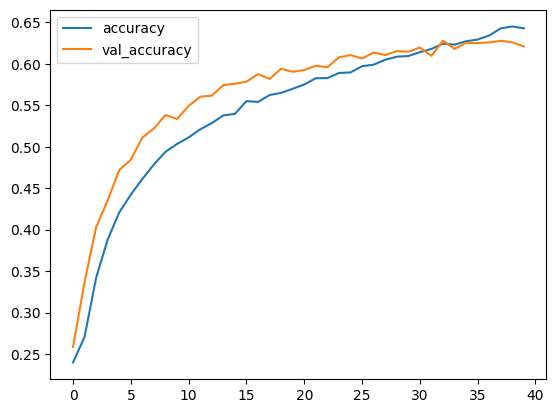

In [ ]:
import pandas as pd
metrics_df = pd.DataFrame(history2.history)
metrics_df[["accuracy","val_accuracy"]].plot();

In [ ]:
model2.save("emotion_detection_cv.keras")

In [4]:
!pip uninstall tensorflowjs
!pip install tensorflowjs


INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 94.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully unin

In [1]:
import tensorflowjs as tfjs

In [3]:
import tensorflow as tf
model2 = tf.keras.models.load_model("/content/emotion_detection_cv.keras")

In [3]:
model2.save("emotion_detection_cv.h5")

In [4]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model2, 'emotion_detection_cv')

failed to lookup keras version from the file,
    this is likely a weight only file


In [5]:
import shutil

tfjs_model_folder = '/content/emotion_detection_cv'

zipped_model_path = '/content/emotion_detection_cv.zip'

shutil.make_archive(zipped_model_path.replace('.zip', ''), 'zip', tfjs_model_folder)


'/content/emotion_detection_cv.zip'

In [17]:
def load_and_prep_image(filename, img_shape=128):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = tf.image.rgb_to_grayscale(img)
  img = img/255.
  return img


In [23]:
model2.predict(tf.expand_dims(img, axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


array([[0.11906755, 0.00296528, 0.17818779, 0.17629106, 0.04628112,
        0.4526531 , 0.02455408]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


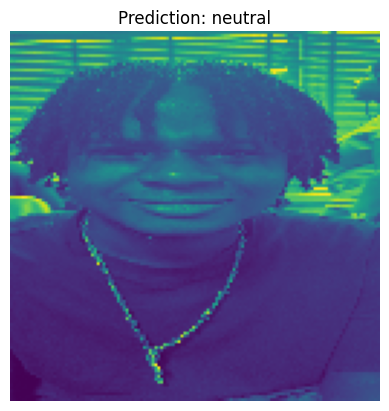

In [34]:
import matplotlib.pyplot as plt

def pred_and_plot(model,filename,class_names):
  img = load_and_prep_image(filename)
  pred = model2.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.argmax(pred[0]))]
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)
pred_and_plot(model2,"/content/IMG_0815.jpg",emotions)

In [19]:
model2.predict(tf.expand_dims(img, axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step


array([[0.11906755, 0.00296528, 0.17818779, 0.17629106, 0.04628112,
        0.4526531 , 0.02455408]], dtype=float32)